## Logistic regression from scratch, and the representer theorem

Let us create some fake two-dimensional data that are basically separable, and try to write a simple logistic regression algorithm.

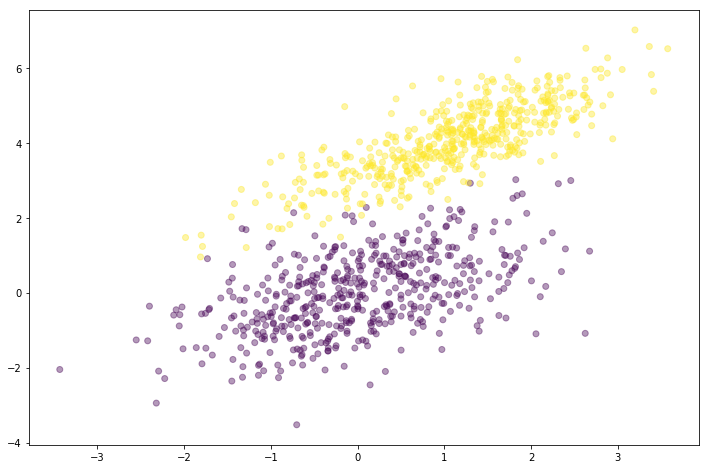

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0], [[1, .5],[.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .8],[.8, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))

plt.figure(figsize=(12,8))
plt.scatter(dataset[:, 0], dataset[:, 1],c = labels, alpha = .4)

Our goal is to use a logistic-type modeling here. In this case:
$$P_{\rm model}(l({\bf x})=1) = \frac 1{1+\exp(-{\bf \theta} \cdot {\bf x})}~~~ \text{and}~~~ P_{\rm model}(l({\bf x})=0) = \frac {\exp(-{\bf \theta} \cdot {\bf x})}{1+\exp(-{\bf \theta} \cdot {\bf x})}$$


Now, we use the cross-entropy loss, and we write:
$${\rm Loss} = - \sum_{\rm dataset} \sum_{l=0,1} P_{\rm true}(x=l) \log(P_{\rm model}(x=l)) $$
This yields the simpler expression:
$${\rm Loss} =  \sum_{\rm dataset} - y_i {\bf \theta} \cdot {\bf x}_i  + \log{(1+\exp({\bf \theta} \cdot {\bf x}_i ))} $$

Let us implement these function

In [68]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
def log_loss(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return -ll

In order to perform optimization, we need to compute the gradient and perform gradient ascent. Here we have:

$$\nabla {\rm Loss} =  \sum_{i \in \rm dataset} - y_i  {\bf x}_i  + {\bf x}_i  \frac{\exp({\bf \theta} \cdot {\bf x}_i )}{(1+\exp({\bf \theta} \cdot {\bf x}_i ))} = - \sum_{i \in \rm dataset} {\bf x^T}_i (y_i - P(l({\bf x_i})=1)) $$

We can now write the  logistic regression

In [69]:
def logistic_regression(features, target, num_steps, learning_rate):

    weights = np.zeros(features.shape[1])##Initialization from 0
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood from time to time
        if step % 10000 == 0:
            print (step," ",log_loss(features, target, weights))
        
    return weights

We use the usual trick of adding a "1" to the data so that we can actually linear fitting, and call the regression function

In [70]:
intercept = np.ones((dataset.shape[0], 1))
data_with_intercept = np.hstack((intercept, dataset))

weights = logistic_regression(data_with_intercept, labels, num_steps = 300000, learning_rate = 5e-5)

0   641.4915413318754
10000   40.79047954980944
20000   35.586186702115704
30000   33.665026487446134
40000   32.68147150954614
50000   32.097685065984834
60000   31.72029157534793
70000   31.46233619756224
80000   31.278962625197885
90000   31.14476121206392
100000   31.04432507177192
110000   30.96781706465473
120000   30.90869650933311
130000   30.86247050712791
140000   30.825969284490604
150000   30.796906261881094
160000   30.773600746306627
170000   30.754797479895224
180000   30.739545968191965
190000   30.72711785580537
200000   30.716949174067366
210000   30.708599234233116
220000   30.701720894578415
230000   30.696038744420566
240000   30.69133289086517
250000   30.687426770101307
260000   30.68417788882525
270000   30.6814707252166
280000   30.6792112393407
290000   30.677322595228407


Now we can plot the prediction from our model, and check how good they are on the training dataset

In [71]:
def line(x,a,b,c):
    return -x*b/c-a/c
def myline(x):
    return line(x,weights[0],weights[1],weights[2])

final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy: {0}'.format((preds == labels).sum().astype(float) / len(preds)))

Accuracy: 0.988


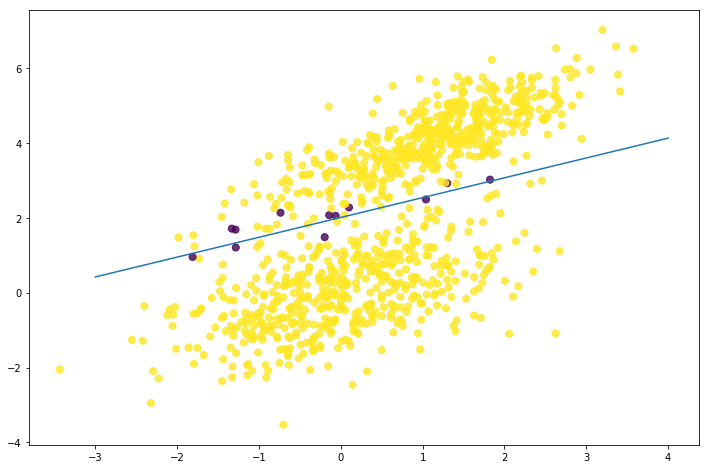

In [72]:
plt.figure(figsize = (12, 8))
plt.scatter(dataset[:, 0], dataset[:, 1],
            c = (preds == labels) , alpha = .8, s = 50)
plt.plot([-3,4],[myline(-3),myline(4)])

# Lower dimension

In high dimensional statistcs problems, it is often the case that the number of points are of the same order as the dimension. Let us mimick this by using fewer points in dimension 2!

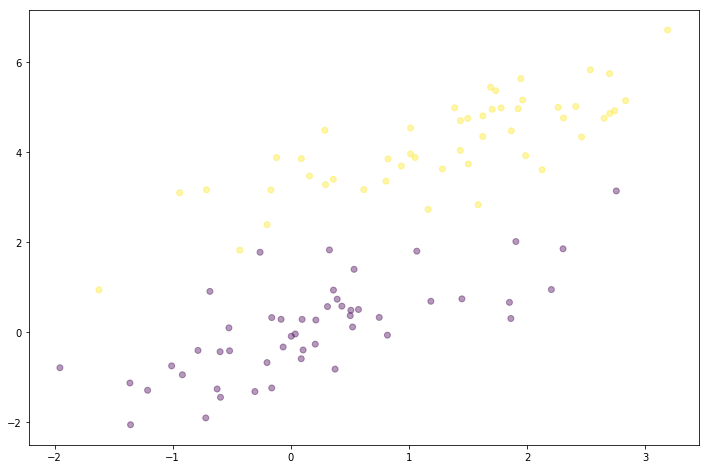

In [73]:
np.random.seed(12)
num_observations = 50

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
plt.figure(figsize=(12,8))
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, alpha = .4)

Of course, we could just redo our fit

In [74]:
intercept = np.ones((dataset.shape[0], 1))
data_with_intercept = np.hstack((intercept, dataset))

weights = logistic_regression(data_with_intercept, labels,num_steps = 100000, learning_rate = 1e-1)

0   303.5518681887195
10000   2.3821586260354994
20000   2.37614662598415
30000   2.3756893661885226
40000   2.3756445953974294
50000   2.37563989841609
60000   2.375639394927834
70000   2.375639340579939
80000   2.375639334700091
90000   2.375639334063495


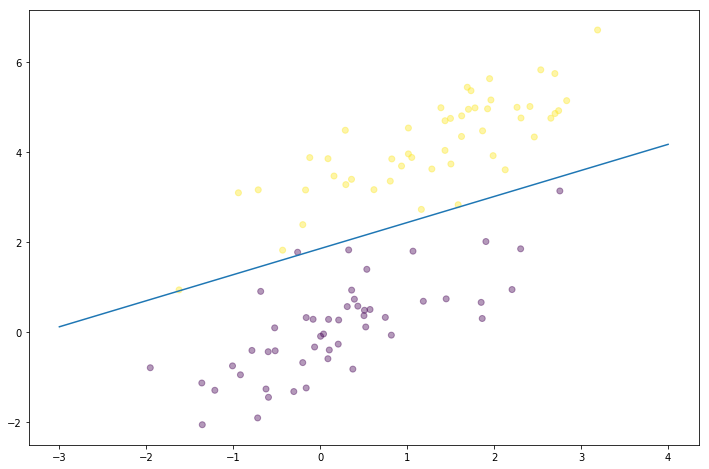

In [75]:
def myline(x):
    return line(x,weights[0],weights[1],weights[2])

plt.figure(figsize=(12,8))
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, alpha = .4)
plt.plot([-3,4],[myline(-3),myline(4)])

BTW: an interesting experiment is to have a situation when the data can be linearly seprated. In this case, it is interesting to stop the fitting a bit early, then we see that as we continue to fit, the separatrix moves "away" from the point, and actually help putting a margin, thus helpling the generalization. This is one of the appeal of the cross-entropy loss.

# Representer theorem

Now, we shall illusrtate the Representer theorem. It states that instead of using 
$\sigma(a*x_1+b*x_2+c)$, we can parametrize everything as
$\sigma(\sum_{i=1}^P \alpha_i x_i \cdot x)$ and perform gradient descent in $\{\alpha\}$.

Let us do this, and let's do it in a non efficient way to see how it actually works.

Essentially we just replace $s={\bf \theta} \cdot {\bf x}_i$ by
$$
s=\sum_{j=1}^n \alpha_j ({\bf x}_i \cdot {\bf x}_j)
$$

So the loss now reads
$${\rm Loss} =  \sum_{i \in \rm dataset} - y_i (\sum_{j=1}^n \alpha_j ({\bf x}_i \cdot {\bf x}_j))  + \log{(1+\exp(\sum_{j=1}^n \alpha_j ({\bf x}_i \cdot {\bf x}_j) ))} $$

This transofrm the gradient descent into:

$$\nabla_j {\rm Loss} =  \sum_{i \in \rm dataset} - y_i  {\bf x}_i \cdot {\bf x}_j   + {\bf x}_i \cdot {\bf x}_j  \frac{\exp(\sum_{j=1}^n \alpha_{j'} ({\bf x}_i \cdot {\bf x}_{j'}))}{(1+\exp(\sum_{j=1}^n \alpha_{j'} ({\bf x}_i \cdot {\bf x}_{j'}) ))}  = - \sum_{i \in \rm dataset} {\bf x}_i \cdot {\bf x}_j  (y_i - P(l({\bf x_i})=1)) $$

This is quite similar to the former one, but we see we are going to use the scalar products between of datapoints fairly often. Let us thus give it a name and compute it once for all. We define the gram matrix
$$
K_{i,j} = {\bf x}_i \cdot {\bf x}_j
$$

In [56]:
gram_matrix = data_with_intercept@data_with_intercept.T

Now the gradient is written
$$\nabla_j {\rm Loss}  = - \sum_{i \in \rm dataset} K_{i,j}  (y_i - P(l({\bf x_i})=1)) $$

In [57]:
def new_log_loss(gram_matrix,target, weights):
    scores = gram_matrix@weights
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [58]:
def new_logistic_regression(gram, target, num_steps, learning_rate):
    weights = np.zeros(gram.shape[0])#now this scales with number of datapoints
    
    for step in range(num_steps):
        scores = gram@weights
        predictions = sigmoid(scores)#this is like before

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = gram@output_error_signal
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (step," ",log_loss(gram_matrix, target, weights))
        
    return weights

In [66]:
weights = new_logistic_regression(gram_matrix, labels, num_steps = 1000000, learning_rate = 1e-4)

0   425.13862566781086
10000   2.859979003860972
20000   2.6554487342493935
30000   2.5638343849122394
40000   2.5115453763302114
50000   2.4780979846269036
60000   2.455185318444779
70000   2.438741989545702
80000   2.4265339843130382
90000   2.417231820607525
100000   2.409996462933579
110000   2.404273836158286
120000   2.3996845517276646
130000   2.395961010466899
140000   2.3929097254476037
150000   2.390387821576596
160000   2.3882878710159923
170000   2.386527819427692
180000   2.385044123801873
190000   2.38378697413756
200000   2.3827169009882594
210000   2.3818023249916713
220000   2.3810177592404687
230000   2.3803424720654327
240000   2.379759479676911
250000   2.3792547785324047
260000   2.378816754213355
270000   2.3784357218250296
280000   2.3781035654802753
290000   2.3778134531880797
300000   2.3775596096664655
310000   2.3773371340394123
320000   2.3771418525958508
330000   2.3769701991442527
340000   2.3768191172403914
350000   2.3766859798662523
360000   2.376568523